Implement the fragmentation scheme in reverse to 'grow' some particles.

### Cozar Scheme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def fragmentation_event(L, k, fragmentation_mode):
    """
    L: lenght of cube
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    new_L = L*fragmentation_mode
    k += 1
    
    return new_L, k

In [3]:
def fix_mode(V, fragmentation_mode):
    """
    V: volume of sphere
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    new_V = V/fragmentation_mode
   
    return new_V

def random_mode(V):
    """
    V: volume of sphere
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    n = V.shape[0]
    fragmentation_mode = np.random.rand(n)
    print(fragmentation_mode)
    new_V = V/fragmentation_mode
    
    return new_V

In [72]:
np.random.choice([8, 4, 2, 1], p=np.array([8/14.5, 4/14.5, 2/14.5, 0.5/14.5]))

2

In [73]:
def frag_vec(V, dt, fragmentation_timescale, mode):
    n = V.shape[0]
    frag_prob = math.exp(-abs(dt)/(fragmentation_timescale))
    
    frag_prob = np.ones(n)*frag_prob
    rnd_num = np.random.rand(n)
    
    truth = rnd_num  > frag_prob
    
    if mode == 'rand':
        fragmentation_mode = np.random.rand(n)*truth + ~truth
        V = V/fragmentation_mode
        
    elif mode == 'fix':
        fragmentation_mode = 1/2*truth + ~truth
        V = V/fragmentation_mode
        
    elif mode == '3D':
        fragmentation_mode = 1/2*truth + ~truth
        V = V/fragmentation_mode
        
    elif mode == 'Mika':
        fragmentation_mode = np.random.choice([8, 4, 2, 1], p=np.array([8/14.5, 4/14.5, 2/14.5, 0.5/14.5]))
        V = V*fragmentation_mode
        
    return V

In [74]:
def fragmentation(V, dt, fragmentation_timescale, mode):
    """
    mode: 'rand' or 'fix'.
    """
    n = V.shape[0]
    print(n)
    fragmentation_prob = math.exp(-dt/(fragmentation_timescale))
    rnd_num = np.random.rand(n)
    
    if rnd_num > fragmentation_prob and mode == 'rand':
        V = random_mode(V)
        
    elif rnd_num > fragmentation_prob and mode == 'fix':
        V = fix_mode(V, 1/2)

        
    return V

In [75]:
def logistic_map(x, r):
    x_1 = r*x*(1 - x)
    
    return x_1

# Settling velocity

In [45]:
5/1000

0.005

In [46]:
def sinkingVelocity(radius, β, ν):
    alpha = radius
    g = 9.81
  
    tau_p = alpha*alpha/(3*β*ν)
    
    v_s = (1 - β)*g*tau_p
        
    
    return v_s

# Experiment 

In [47]:
np.zeros(40) > 2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [48]:
np.linspace(10, 0, 11)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.])

In [134]:
r = 5e-8 # 100nm
k = 0
sim_time = 100 #365*10
N = sim_time + 1
V = 4/3 * np.pi*r**3
mode = 1/2
frag_timescale = 1000
frag_mode = 1/2
k = 0
particles = 10000
initial_depth = 5000

time = np.linspace(0, sim_time, N)
dt = time[1] - time[0]

radiuses_rand = np.zeros((particles, N))
volumes_rand = np.zeros((particles, N))

radiuses_fix = np.zeros((particles, N))
volumes_fix = np.zeros((particles, N))

length_3d = np.zeros((particles, N))
volumes_3d = np.zeros((particles, N))
depth_3d = np.zeros((particles, N)) + 5000

radiuses_rand[:, 0] = r
volumes_rand[:, 0] = V

radiuses_fix[:, 0] = r
volumes_fix[:, 0] = V

length_3d[:, 0] = r
volumes_3d[:, 0] = (r)**3

for i in range(N-1):
    vr = volumes_rand[:, i]
    vf = volumes_fix[:, i]
    volumes_rand[:, i+1] = frag_vec(vr , dt, frag_timescale, 'rand')
    volumes_fix[:, i+1] = frag_vec(vf, dt, frag_timescale, 'fix')
    
    radiuses_rand[:, i+1] = np.cbrt(3*volumes_rand[:, i+1]/(4*np.pi))
    radiuses_fix[:, i+1] = np.cbrt(3*volumes_fix[:, i+1]/(4*np.pi))
    
    l = length_3d[:, i]
    depth_3d[:, i+1] = depth_3d[:, i] - sinkingVelocity(l, 0.8, 1e-6)*dt
    
    length_3d[:, i+1] = frag_vec(l, dt, frag_timescale, '3D')
    volumes_3d[:, i+1] = length_3d[:, i+1]**3

[]

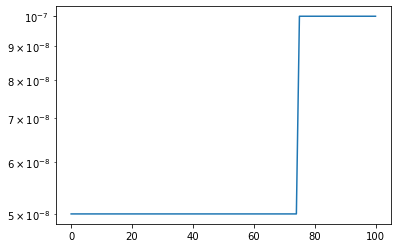

In [135]:
plt.plot(length_3d[1,:])
plt.semilogy()

In [136]:
mean_rand = np.mean(radiuses_rand, axis=0)
mean_vol_rand = np.mean(volumes_rand, axis=0)

mean_fix = np.mean(radiuses_fix, axis=0)
mean_vol_fix = np.mean(volumes_fix, axis=0)

mean_3D = np.mean(length_3d, axis=0)
mean_vol_3D = np.mean(volumes_3d, axis=0)

mean_depth = np.mean(depth_3d, axis=0)
std_depth = np.std(depth_3d, axis=0)


[]

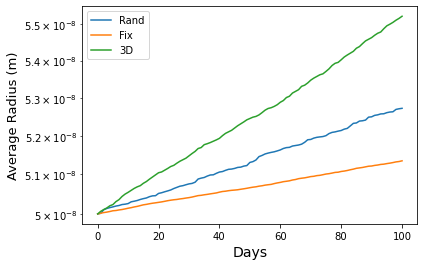

In [137]:
plt.plot(time, mean_rand, label=r'Rand')
# plt.fill_between(time, mean_rand + std_rand, mean_rand, alpha=0.2, color='b')
# plt.fill_between(time, mean_rand , mean_rand - std_rand, alpha=0.2, color='b')

plt.plot(time, mean_fix, label=r'Fix')
# plt.fill_between(time, mean_fix + std_fix, mean_fix, alpha=0.2, color='orange')
# plt.fill_between(time, mean_fix , mean_fix - std_fix, alpha=0.2, color='orange')

plt.plot(time, mean_3D, label='3D')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Average Radius (m)', fontsize=13)
plt.legend(loc='upper left')
plt.semilogy()

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


[]

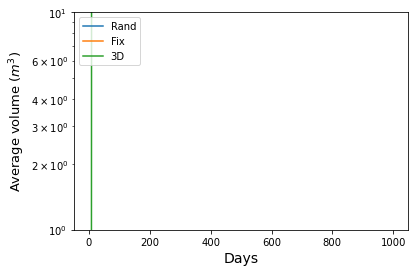

In [129]:
plt.plot(time, mean_vol_rand, label=r'Rand')
# plt.fill_between(time, mean_rand + std_rand, mean_rand, alpha=0.2, color='b')
# plt.fill_between(time, mean_rand , mean_rand - std_rand, alpha=0.2, color='b')

plt.plot(time, mean_vol_fix, label=r'Fix')
# plt.fill_between(time, mean_fix + std_fix, mean_fix, alpha=0.2, color='orange')
# plt.fill_between(time, mean_fix , mean_fix - std_fix, alpha=0.2, color='orange')

plt.plot(time, mean_vol_3D, label='3D')

plt.xlabel('Days', fontsize=14)
plt.ylabel(r'Average volume ($m^3$)', fontsize=13)
plt.legend(loc='upper left')
plt.semilogy()

In [143]:
size_dist, binss = np.histogram(length_3d[:, -1], bins=np.logspace(-8, -5, 30))
size_dist_fix, _ = np.histogram(radiuses_fix[:, -1], bins=np.logspace(-8, -5, 30))
size_dist_rand, _ = np.histogram(radiuses_rand[:, -1], bins=np.logspace(-8, -5, 30))

In [144]:
binss

array([1.00000000e-08, 1.26896100e-08, 1.61026203e-08, 2.04335972e-08,
       2.59294380e-08, 3.29034456e-08, 4.17531894e-08, 5.29831691e-08,
       6.72335754e-08, 8.53167852e-08, 1.08263673e-07, 1.37382380e-07,
       1.74332882e-07, 2.21221629e-07, 2.80721620e-07, 3.56224789e-07,
       4.52035366e-07, 5.73615251e-07, 7.27895384e-07, 9.23670857e-07,
       1.17210230e-06, 1.48735211e-06, 1.88739182e-06, 2.39502662e-06,
       3.03919538e-06, 3.85662042e-06, 4.89390092e-06, 6.21016942e-06,
       7.88046282e-06, 1.00000000e-05])

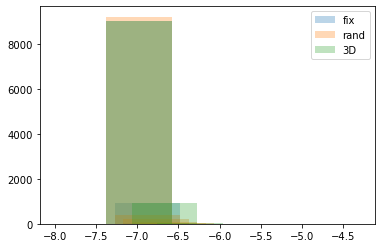

In [145]:
plt.bar(np.log10(binss[0:-1]), size_dist_fix, align='edge', alpha=0.3, label='fix')
plt.bar(np.log10(binss[0:-1]), size_dist_rand, align='edge', alpha=0.3, label='rand')
plt.bar(np.log10(binss[0:-1]), size_dist, align='edge', alpha=0.3, label='3D')
plt.legend()


In [71]:
8/14.5

0.5517241379310345

In [ ]:
# plt.hist(radiuses_rand[:, -1], bins=100, color='b', alpha=0.5);
# plt.hist(radiuses_fix[:, -1], bins=100, color='r', alpha=0.5);
plt.hist(length_3d[:, -1], bins=np.logspace(-8, -3, 100), color='g', alpha=0.5);
# plt.semilogx()

# Average time it take the particle to reach the surface

In [16]:
length_3d

array([[2.5e-08, 2.5e-08, 2.5e-08, ..., 1.6e-06, 1.6e-06, 1.6e-06],
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 2.5e-08, 2.5e-08, 2.5e-08],
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 2.0e-07, 2.0e-07, 2.0e-07],
       ...,
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 2.0e-07, 2.0e-07, 2.0e-07],
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 1.6e-06, 1.6e-06, 1.6e-06],
       [2.5e-08, 2.5e-08, 2.5e-08, ..., 2.0e-07, 2.0e-07, 2.0e-07]])

In [13]:
v_s = sinkingVelocity(length_3d, 0.8, 1e-6)

In [ ]:
mean_rand = np.mean(radiuses_rand, axis=0)
mean_vol_rand = np.mean(volumes_rand, axis=0)

mean_fix = np.mean(radiuses_fix, axis=0)
mean_vol_fix = np.mean(volumes_fix, axis=0)

mean_3D = np.mean(length_3d, axis=0)
mean_vol_3D = np.mean(volumes_3d, axis=0)


# Sensibility to dt

In [140]:
DTs = np.logspace(1e-5, 10, 10001)

In [141]:
frag_timescale = 1000

In [142]:
frag_probas  = np.exp(-DTs/(frag_timescale))

Text(0, 0.5, 'Fragmentation Probability')

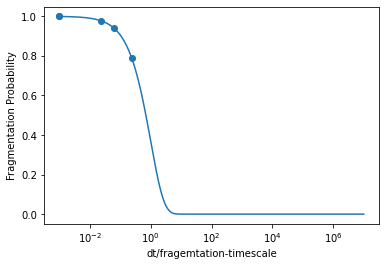

In [152]:
plt.semilogx(DTs/frag_timescale, frag_probas)
plt.scatter(dT/frag_timescale, frag_probas_scat)
plt.xlabel('dt/fragemtation-timescale')
plt.ylabel('Fragmentation Probability')

In [147]:
dT = np.array([1,60, 1, 24, 240])
frag_probas_scat  = np.exp(-dT/(frag_timescale))

In [148]:
dT

array([  1,  60,   1,  24, 240])

# sensitivity to fragmentation timescales 

In [149]:
# parameters
r = 5e-8 # 100nm
k = 0
sim_time = 1000 #365*10
N = sim_time + 1
V = 4/3 * np.pi*r**3
mode = 1/2
frag_timescale = 100
frag_mode = 1/2
k = 0
particles = 1000
initial_depth = 1000
β = 0.8
ν = 1e-6

# Da Arrais
time = np.linspace(0, sim_time, N)
dt = time[1] - time[0]

lengthxx = np.zeros(particles)
depthxx = np.zeros(particles) + initial_depth
agexx = np.zeros(particles)

lengthxx[:] = r
online = sum(depthxx > 20)
i = 0

while online != 0:
# for i in range(sim_time):
    truth = depthxx > 20
    length_lim = lengthxx < 1e-3
    
    depthxx = depthxx - sinkingVelocity(lengthxx, β, ν)*dt*truth
    lengthxx = frag_vec(lengthxx, dt, frag_timescale, '3D')*length_lim
    agexx = agexx + 1*truth
    online = sum(truth)
#     i += 1

KeyboardInterrupt: 

In [ ]:
plt.scatter(depthxx, lengthxx)
plt.semilogy()

In [126]:
depthxx

array([ 4.97467553e+03,  4.99603710e+03,  4.99901055e+03,  4.99999824e+03,
        4.99999434e+03,  4.99996095e+03,  3.90570000e+03,  4.99999882e+03,
        4.92491968e+03,  4.99945578e+03,  4.99949268e+03,  4.95065828e+03,
        4.98847698e+03,  4.99999992e+03,  4.99557721e+03,  4.99987269e+03,
        4.99392216e+03,  4.99813586e+03,  4.99957905e+03,  4.88073032e+03,
        4.99917834e+03,  4.99989587e+03,  4.99733137e+03,  4.99999110e+03,
        4.99999951e+03,  4.99794962e+03,  4.98594714e+03,  4.99999995e+03,
        4.99999884e+03,  4.98479068e+03,  4.79136208e+03,  4.99998231e+03,
        4.99948244e+03,  3.99121125e+03,  4.99837914e+03,  4.97189461e+03,
        4.98025755e+03,  4.99798580e+03,  4.79387667e+03,  4.99999998e+03,
        4.93731276e+03,  4.80819712e+03,  4.99999148e+03,  4.99954219e+03,
        4.99952962e+03,  4.99300131e+03,  4.99999728e+03,  4.99998528e+03,
        4.99993385e+03,  4.99998490e+03,  4.99997916e+03,  1.94375173e+03,
        4.98646856e+03,  